In [10]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tensors and operations

1. Create tensor matriks

In [12]:
# create matriks 2 x 3
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [13]:
# scalar tensor
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

2. create indexing

In [18]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [19]:
t[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

3. Operations

In [20]:
t + 10 # same to tf.add(t,10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [21]:
tf.add(t,10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [27]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [28]:
# transpose matriks
# @ same to tf.matmul() 
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [29]:
tf.matmul(t,tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

4. Keras low level API -> keras.backend

In [32]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

# Tensorflow and Numpy

1. From/ To Numpy

default tensor use 32 bit and the numpy is 64 bit

if want make tensor from numpy must convert to 32 bit

In [37]:
# create tensor from numpy
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [38]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [39]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [40]:
tf.constant(a,dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 5.], dtype=float32)>

In [41]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

2. Conflting types

Tidak secara otomatis me resolve sebuah confliting types, just raise the exeception to solve that

In [42]:
# the tensor cant to add the float and int type data
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex :
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [44]:
# must be convert anyone
try :
    t2=tf.constant(2.0) + tf.constant(40,dtype=tf.float32)
except tf.errors.InvalidArgumentError as ex:
    print(ex)
print(t2)

tf.Tensor(42.0, shape=(), dtype=float32)


3. Variables

In [47]:
v = tf.Variable([[1,2,3],[4,5,6]])

In [48]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [49]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=int32, numpy=
array([[ 2, 42,  6],
       [ 8, 10, 12]])>

In [51]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


# Custom Loss Function

In [54]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,
                                                           housing.target.reshape(-1,1),random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_valid_scalled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [55]:
y_test

array([[0.477  ],
       [0.458  ],
       [5.00001],
       ...,
       [1.177  ],
       [2.631  ],
       [4.815  ]])

In [59]:
def huber_fn(y_true,y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <1
    squared_loss = tf.square(error) /2 
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error,squared_loss,linear_loss)

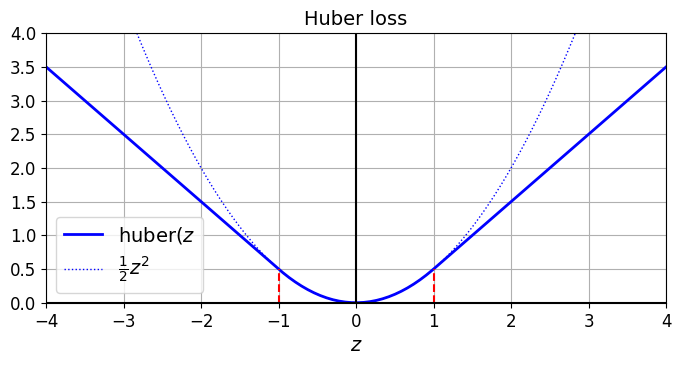

In [62]:
plt.figure(figsize=(8,3.5))
z = np.linspace(-4,4,200)
plt.plot(z,huber_fn(0,z),"b-",linewidth=2,label="huber($z$")
plt.plot(z,z**2 / 2, "b:",linewidth=1,label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()